In [1]:
import pandas as pd
import pickle 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk('analytic_df.pkl'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_pickle('analytic_df.pkl')

In [4]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

<AxesSubplot:ylabel='isFraud'>

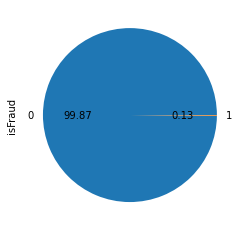

In [5]:
data_fraud=df['isFraud'].value_counts()
data_fraud.plot.pie(autopct='%.2f')

In [ ]:
#As showen we need to do some feature engineer into our data set,
#to make our data balanced and accurte for model be more correct and normal

In [6]:
c_class_0, c_class_1 = df.isFraud.value_counts()

x= df[df['isFraud']==0]
y= df[df['isFraud']==1]

<AxesSubplot:title={'center':'Under Sampling'}, ylabel='isFraud'>

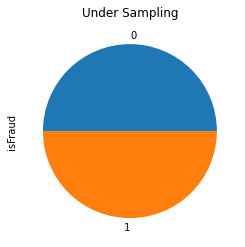

In [7]:
data_class_0_under = x.sample(c_class_1)
# Here we are reducing the number of records with 0 as label to that of number of records equal to 1
# Pandas sample() is used to randomly select passed number of records

data_test_under = pd.concat([data_class_0_under, y], axis=0)
#Concatening the data one after the other to create one single dataframe containing all the data

data_test_under.isFraud.value_counts().plot(kind='pie',title='Under Sampling')

In [8]:
data_test_under.shape

(16426, 8)

In [9]:
data_test_under

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1533542,154,2,259500.87,2602539.43,2862040.30,2277849.22,2018348.35,0
6185610,567,1,26757.98,108635.83,81877.85,0.00,0.00,0
3005197,232,1,11223.25,40997.65,29774.40,0.00,0.00,0
822808,40,3,284852.00,0.00,0.00,1526139.91,1810991.91,0
671317,36,1,27152.63,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,0,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,3,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,0,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,3,850002.52,850002.52,0.00,0.00,0.00,1


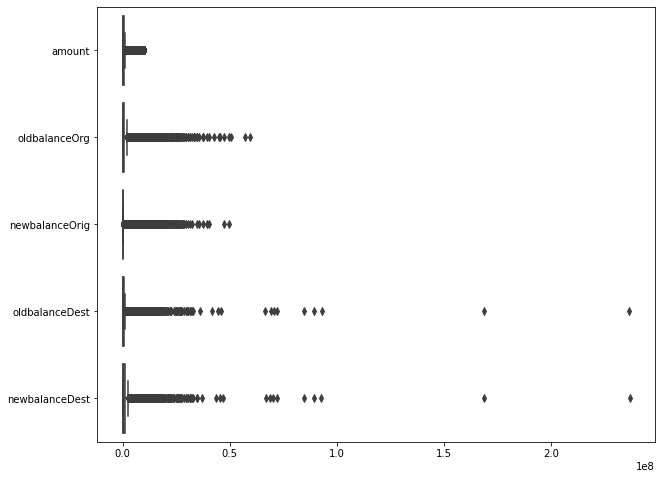

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data_test_under[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [11]:
upper_limit=data_test_under["oldbalanceDest"].mean()+3*data_test_under["oldbalanceDest"].std()
upper_limit

11721693.312576655

In [12]:
lower_limit=data_test_under["oldbalanceDest"].mean()-3*data_test_under["oldbalanceDest"].std()
lower_limit

-10010690.928995743

In [13]:
data_test_under=data_test_under[(data_test_under.oldbalanceDest<upper_limit) & (data_test_under.oldbalanceDest>lower_limit)]
data_test_under.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1533542,154,2,259500.87,2602539.43,2862040.30,2277849.22,2018348.35,0
6185610,567,1,26757.98,108635.83,81877.85,0.00,0.00,0
3005197,232,1,11223.25,40997.65,29774.40,0.00,0.00,0
822808,40,3,284852.00,0.00,0.00,1526139.91,1810991.91,0
671317,36,1,27152.63,0.00,0.00,0.00,0.00,0


In [14]:
upper_limit2=data_test_under["newbalanceDest"].mean()+3*data_test_under["newbalanceDest"].std()
upper_limit2


7534268.664395416

In [15]:
lower_limit2=data_test_under["newbalanceDest"].mean()-3*data_test_under["newbalanceDest"].std()
lower_limit2

-5401707.591516854

In [16]:
data_test_under[(data_test_under.newbalanceDest>upper_limit2) | (data_test_under.newbalanceDest<lower_limit2)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
3853466,283,0,221744.28,0.00,0.0,9748187.99,9969932.27,0
5350658,375,3,6900453.70,0.00,0.0,11426761.01,18327214.72,0
5370707,376,0,94050.75,0.00,0.0,7890953.08,7985003.83,0
6042620,490,3,138456.85,60278.00,0.0,9602057.12,9740513.98,0
2641924,209,3,44742.30,5014.00,0.0,10542829.80,10587572.10,0
...,...,...,...,...,...,...,...,...
6362563,739,0,7758036.72,7758036.72,0.0,47778.61,7805815.33,1
6362577,741,0,10000000.00,10000000.00,0.0,0.00,10000000.00,1
6362579,741,0,10000000.00,10000000.00,0.0,35922.97,10035922.97,1
6362581,741,0,10000000.00,10000000.00,0.0,0.00,10000000.00,1


In [17]:
data_test_under=data_test_under[(data_test_under.newbalanceDest<upper_limit2) & (data_test_under.newbalanceDest>lower_limit2)]
data_test_under.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1533542,154,2,259500.87,2602539.43,2862040.30,2277849.22,2018348.35,0
6185610,567,1,26757.98,108635.83,81877.85,0.00,0.00,0
3005197,232,1,11223.25,40997.65,29774.40,0.00,0.00,0
822808,40,3,284852.00,0.00,0.00,1526139.91,1810991.91,0
671317,36,1,27152.63,0.00,0.00,0.00,0.00,0


In [18]:
upper_limit3=data_test_under["oldbalanceOrg"].mean()+3*data_test_under["oldbalanceOrg"].std()
upper_limit3

10440312.776609166

In [19]:
lower_limit3=data_test_under["oldbalanceOrg"].mean()-3*data_test_under["oldbalanceOrg"].std()
lower_limit3

-8218530.576546906

In [20]:
data_test_under[(data_test_under.oldbalanceOrg>upper_limit3) | (data_test_under.oldbalanceOrg<lower_limit3)]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2101139,182,2,67133.86,14037260.16,14104394.02,3059842.18,2992708.31,0
3846603,282,2,182963.08,13744277.49,13927240.57,476812.51,293849.43,0
3193557,249,2,119933.23,15770388.18,15890321.41,4233799.52,4113866.28,0
461844,19,2,51555.62,22357282.20,22408837.82,1162759.93,1413778.31,0
4509931,325,2,99411.60,13780865.63,13880277.23,574739.03,475327.44,0
...,...,...,...,...,...,...,...,...
6362528,736,3,10000000.00,11314660.84,1314660.84,0.00,0.00,1
6362576,741,3,10000000.00,45674547.89,35674547.89,0.00,0.00,1
6362578,741,3,10000000.00,35674547.89,25674547.89,0.00,0.00,1
6362580,741,3,10000000.00,25674547.89,15674547.89,0.00,0.00,1


In [22]:
data_test_under=data_test_under[(data_test_under.oldbalanceOrg<upper_limit3) & (data_test_under.oldbalanceOrg>lower_limit3)]
data_test_under.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1533542,154,2,259500.87,2602539.43,2862040.30,2277849.22,2018348.35,0
6185610,567,1,26757.98,108635.83,81877.85,0.00,0.00,0
3005197,232,1,11223.25,40997.65,29774.40,0.00,0.00,0
822808,40,3,284852.00,0.00,0.00,1526139.91,1810991.91,0
671317,36,1,27152.63,0.00,0.00,0.00,0.00,0


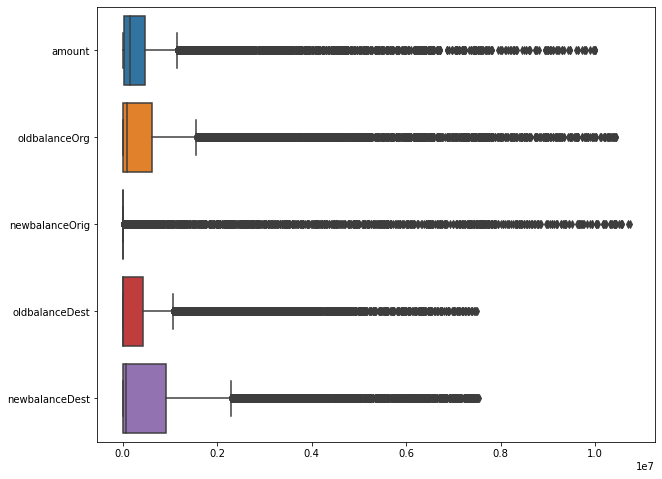

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data_test_under[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]],orient="h")
plt.show()

In [24]:
data_test_under["isFraud"].value_counts()

0    7765
1    7675
Name: isFraud, dtype: int64

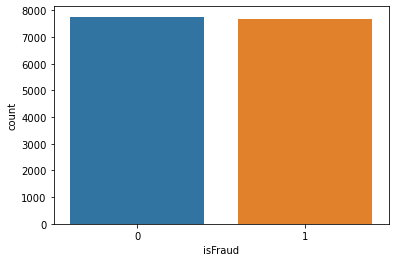

In [25]:
sns.countplot(x="isFraud",data=data_test_under)
plt.show()

In [30]:
data_test_under.to_csv('DatasetAfterFE.csv',index=False)

In [28]:
with open('feature_engineer_df.pkl', 'wb') as f:
    pickle.dump(data_test_under, f)

In [29]:
print("Data saved successfully!")


Data saved successfully!
